<center>
<h3>Deakin University</h3>
    <h4>SIG720-Machine Learning</h4>
   <h3>Credit Task 2</h3>
</center>
<div style="border-top:1px solid #d1d1d1; padding:4px">
<strong>Submitted by</strong>
    <br/>
Surendra Bahadur Rai
      <br/>
ID: 223940212
      <br/>
Date: Aug 27th 2023
      <br/>
</div>

<h3>C2 Task solution</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import export_graphviz
import pydot
from sklearn.datasets import load_wine

%matplotlib inline

<p>
<h3> Support Vector Machine (SVM)</h3>
<br/>    
A Support Vector Machine is a powerful supervised machine learning algorithm used for both classification and regression tasks.
It is a supervised machine learning.but generaly, they work best in classification problems. It works by finding the hyperplane that best separates different classes in the data while maximizing the margin between them.
 <img src="img/svm.png" width="20%" />
</p>
<h3>Hyperparameters for SVM:</h3>
<p>
   <strong> Kernel:</strong> The kernel determines the type of hyperplane used to separate the classes.
    it's method used to take data as input and transform it into the required form of processing data. 
</p>
<p>
    <strong> Linear Kernel:</strong> No transformation, just a linear hyperplane seperation.
</p>
 <p>
    <strong> Polynomial Kernel:</strong> Maps data into higher dimensions using polynomial functions.
 </p>
<p>
  <strong> Radial Basis Function (RBF) Kernel:</strong>Maps data into higher dimensions using Gaussian functions.
     <img src="img/rbf.png" width="50%" />
    <pre style="font-family: Consolas,'courier new';color: blue;background-color: #f1f1f1;padding: 2px;font-size: 105%;">
     Example:
        from sklearn.svm import SVC
        svm_classifier = SVC(kernel ='rbf', random_state = 0)
        svm_classifier.fit(x_train, y_train)
    </pre>
 </p>
 <p>
    <strong> Sigmoid Kernel:</strong> 
    this function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons. 
     <img src="img/sigmoid.png" width="50%" />
   <br/>
    <pre style="font-family: Consolas,'courier new';color: blue;background-color: #f1f1f1;padding: 2px;font-size: 105%;">
     Example:
        from sklearn.svm import SVC
        svm_classifier = SVC(kernel ='sigmoid', random_state = 0)
        svm_classifier.fit(x_train, y_train)
    </pre>
  </p>
  
  <p>
  <strong> Polynomial Kernel:</strong>
  It represents the similarity of vectors in the training set of data in a feature space over polynomials of the original variables used in the kernel.
     <img src="img/svm_polynomial.png" width="50%" />
    <pre style="font-family: Consolas,'courier new';color: blue;background-color: #f1f1f1;padding: 2px;font-size: 105%;">
     Example:
        from sklearn.svm import SVC
        svm_classifier = SVC(kernel ='poly', random_state = 0)
        svm_classifier.fit(x_train, y_train)
    </pre>
  </p>  
  <strong> C (Regularization Parameter): </strong>
    The C parameter controls the trade-off between achieving a low training error and a low testing error. A small C leads to a wider margin but potentially more misclassified training points, while a large C aims for more accurate classification on training data.
 </p> 
<p>
 <strong> Gamma (Kernel Coefficient for RBF):</strong> 
  This parameter influences the shape of the decision boundary when using the RBF kernel. A smaller gamma results in a softer decision boundary, while a larger gamma leads to a more complex decision boundary that closely fits the training data.
</p>

<p>
    <strong>Degree (for Polynomial Kernel):</strong> 
    This parameter defines the degree of the polynomial kernel function. A higher degree allows the algorithm to consider interactions between features at higher orders.
</p>
  <p>
<strong> Class Weights: </strong>SVMs allow you to assign different weights to different classes, which can be useful when dealing with imbalanced datasets.
</p>

Example: Using wine Dataset from sklearn with SVM: to finding Classification fo wine


In [3]:
#Xample Wine DataSet from sk-learn form SVM Algorighm and Random Foretst Algorithm applying For Hyper parameter example.
wine_data = load_wine()

In [4]:
X = wine_data.data
y = wine_data.target
target_featurs= wine_data.target_names
feature_names = wine_data.feature_names

In [5]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
target_featurs

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
df_xdata = pd.DataFrame(X, columns = wine_data.feature_names )
df_xdata

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


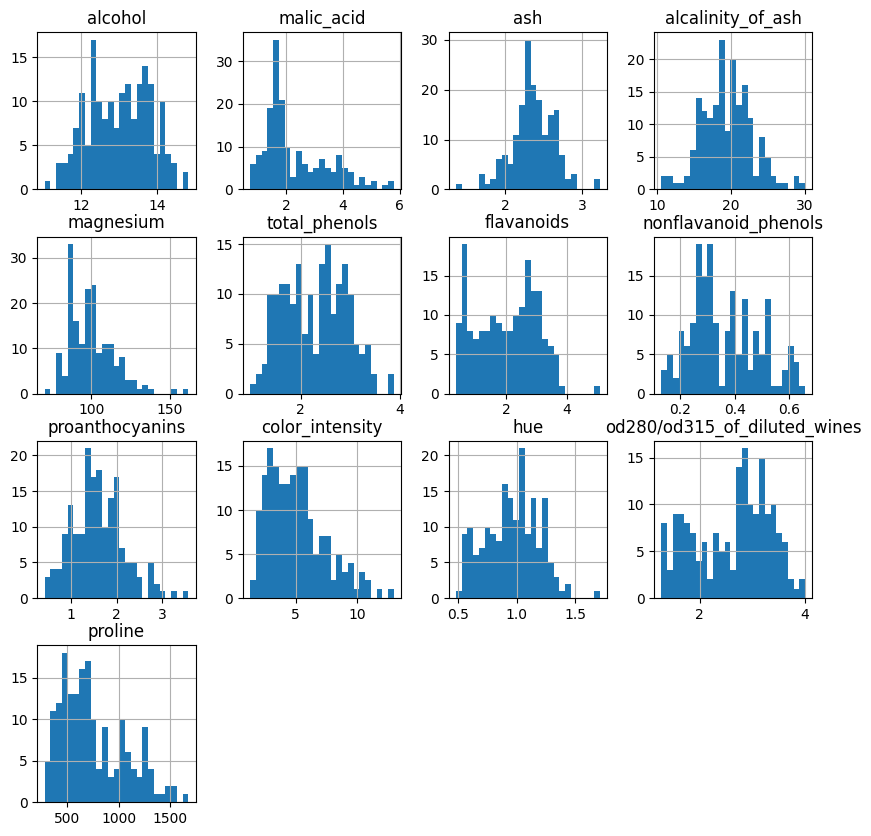

In [8]:
df_xdata.hist(bins=25,figsize=(10,10))
plt.show()

## Spliting the data train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Applying Pipeline 
pip_line = Pipeline([('svm', SVC())])

In [11]:
#Defining the Grid search parameters
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [12]:
#Applying gridsearchCV models
grid_cv = GridSearchCV(pip_line, param_grid, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svm', SVC())]), n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [13]:
#Finding the Best parameter and Estimater & accuracy
best_pipeline = grid_cv.best_estimator_
best_params = grid_cv.best_params_
test_accuracy = best_pipeline.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Test Accuracy: 1.0


In [14]:
#best_pipeline from the hyperparameter tuning predition test data
predictions = best_pipeline.predict(X_test)

In [15]:
for i in range(len(predictions)):
    print(f"Actual: {y_test[i]}, Predicted: {predictions[i]}")

Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0


In [16]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Apply Modle Refinement

In [17]:
#Apply Refinment of Hyper parameter Models with best parameter
refined_svm = SVC(C=0.1, kernel='linear')
refined_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [18]:
refined_predictions = refined_svm.predict(X_test)

In [19]:
refined_accuracy = accuracy_score(y_test, refined_predictions)
print("Refined Model Accuracy:", refined_accuracy)
print("Classification Report for Refined Model:")
print(classification_report(y_test, refined_predictions))

Refined Model Accuracy: 1.0
Classification Report for Refined Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [20]:
#Train datset score
refined_predictions2 = refined_svm.predict(X_train)
refined_accuracy2 = accuracy_score(y_train, refined_predictions2)
print("Refined Model Accuracy:", refined_accuracy2)
print("Classification Report for Refined Model:")
print(classification_report(y_train, refined_predictions2))

Refined Model Accuracy: 0.9647887323943662
Classification Report for Refined Model:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.95      0.96      0.96        57
           2       0.95      0.97      0.96        40

    accuracy                           0.96       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.96      0.96       142



## RandomForestClassifier algorithm

Random Forest is a popular ensemble learning algorithm used for both classification and regression tasks in machine learning. It belongs to the family of decision tree-based methods and is designed to improve the performance and generalization of individual decision trees. 

Random forests can be computationally expensive to train, especially for large datasets.

<h3>RandomForentModel Parameter</h3>
<p>
   <h4>n_estimators:</h4>
The number of trees in the forest. The more trees, the more accurate the model will be, but it will also take longer to train.
 </p>
<p>
   <h4>max_features:</h4> The number of features to consider when making a split in a tree. A higher number of features will make the model more complex, but it may also make it more accurate.
  </p>

<p>
    <h4>max_depth:</h4> The maximum depth of the trees in the forest. A deeper tree will be more complex, but it may also be more prone to overfitting.
        </p>

<p>
    <h4>min_samples_split:</h4> The minimum number of samples required to split a node in a tree. A lower number of samples will make the model more interpretable, but it may also make it less accurate.
        </p>

<p>
    <h4>min_samples_leaf:</h4> The minimum number of samples required in a leaf node. A lower number of samples will make the model more 
interpretable, but it may also make it less accurate.
    </p>

<p>
    <h4>bootstrap:</h4> Whether to use bootstrap sampling when training the trees. Bootstrap sampling means that each tree is trained on a random sample of the data, with replacement. This can help to reduce overfitting.
 </p>
    

In [21]:
#defining Parameter
rparam_gridcv = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
#Apply the RandomForestClassifier Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid_searchCV = GridSearchCV(estimator=rf_classifier, param_grid=rparam_gridcv, cv=5, n_jobs=-1)

In [23]:
#Model Fitting train and test data
rf_grid_searchCV.fit(X_train, y_train)
rf_best_params = rf_grid_searchCV.best_params_
best_rf_classifier = rf_grid_searchCV.best_estimator_

In [24]:
#Evaluate Models on test set
accuracy = best_rf_classifier.score(X_test, y_test)
print("Best Hypere Parameter:", rf_best_params)
print("Best Model Accuracy:", accuracy)

Best Hypere Parameter: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy: 1.0


In [25]:
# Make Predictions
y_pred = best_rf_classifier.predict(X_test)

In [26]:
rf_classification_repport = classification_report(y_test, y_pred, target_names=target_featurs)
print("\nClassification Report:")
print(rf_classification_repport)


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [27]:
print("Clasification Name")
print(target_featurs)
print("Feature Column")
print(feature_names)
print("Feature Impotance")
print(best_rf_classifier.feature_importances_)

Clasification Name
['class_0' 'class_1' 'class_2']
Feature Column
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature Impotance
[0.11239774 0.03570276 0.02128206 0.03242488 0.0368407  0.02927859
 0.20229342 0.01351525 0.02356092 0.17120218 0.07089132 0.11156432
 0.13904587]


In [28]:
#To find the Imporance featue of inside data
imp_df = pd.DataFrame({
    "Feature Name":feature_names,
    "Impportance": best_rf_classifier.feature_importances_
})
imp_df.sort_values(by="Impportance", ascending=False)

,Feature Name,Impportance
6,flavanoids,0.202293
9,color_intensity,0.171202
12,proline,0.139046
0,alcohol,0.112398
11,od280/od315_of_diluted_wines,0.111564
10,hue,0.070891
4,magnesium,0.036841
1,malic_acid,0.035703
3,alcalinity_of_ash,0.032425
5,total_phenols,0.029279


**Visualize the Randdomforest Tree using sklearn pakage**

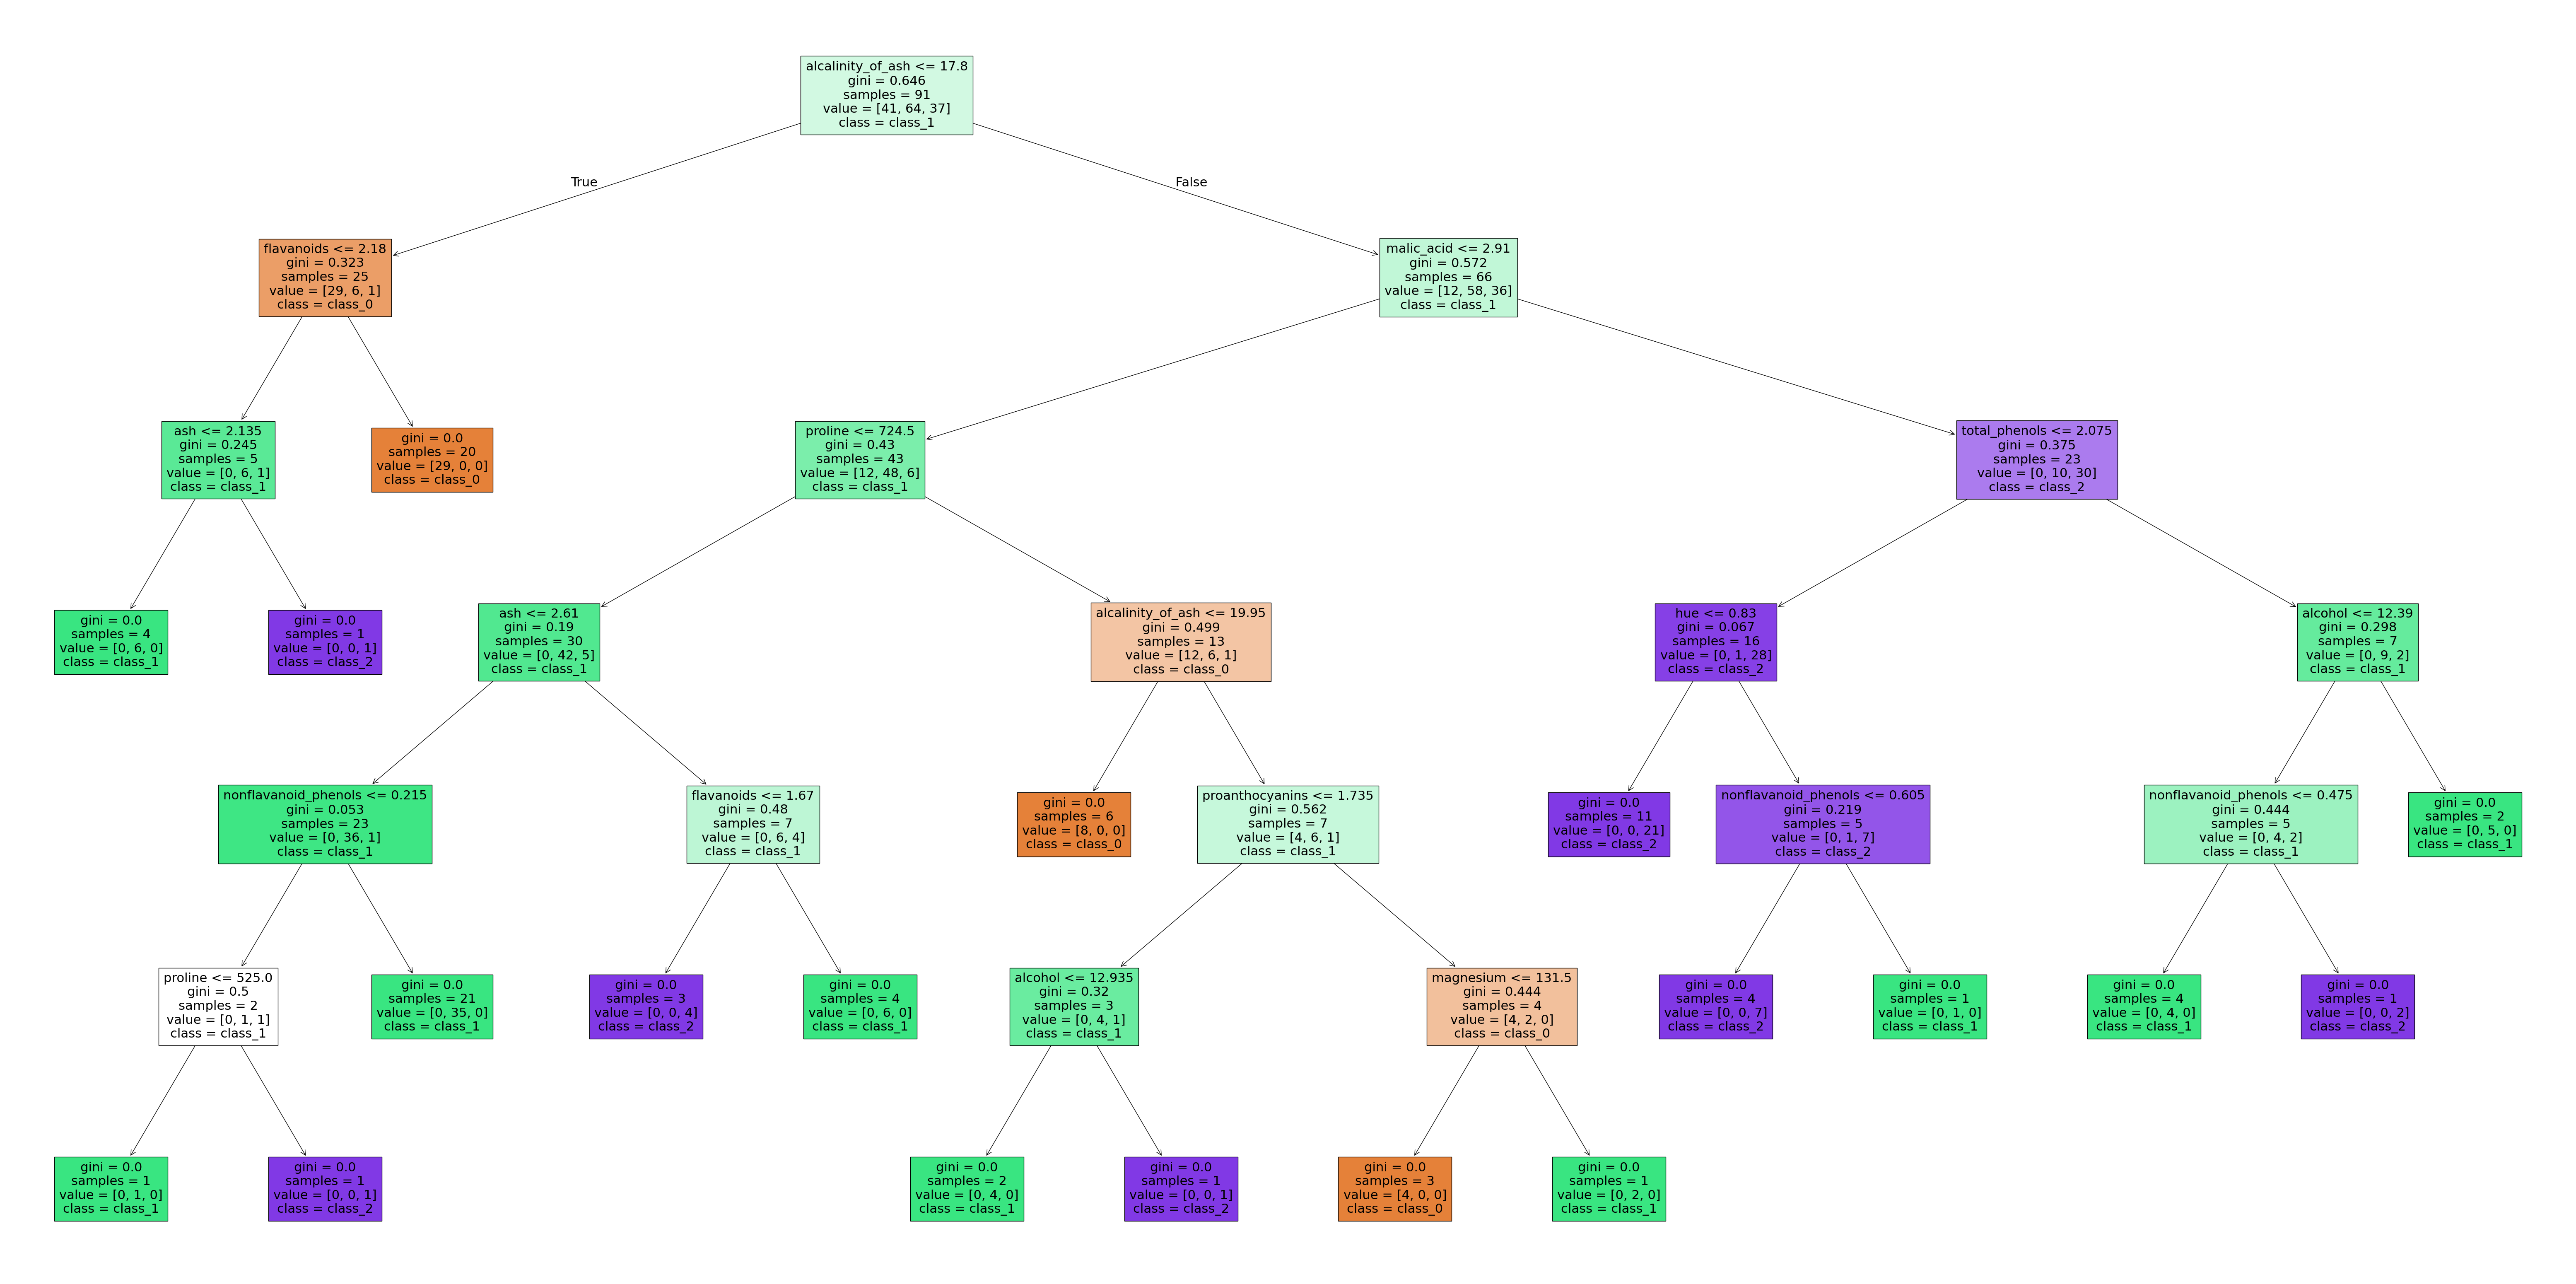

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(best_rf_classifier.estimators_[15], feature_names = feature_names,class_names=target_featurs.tolist(),filled=True);

<h2> Elastic Net Regression</h2>
<p> 
Elastic net is a combination of the two most popular regularized variants of linear regression: ridge and lasso. Ridge utilizes an L2 penalty and lasso uses an L1 penalty. With elastic net. Ridge regression adds L2 regularization to linear regression, which helps to prevent overfitting by penalizing large coefficient values.
  
Lasso regression adds L1 regularization to linear regression. It not only helps with preventing overfitting but also performs feature selection by driving some coefficients to exactly zero.   
</p>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [31]:
#Data spliting X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge Model

In [32]:
# Create a Ridge regression model here alpha 0.1 is reqularize strainth
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Ridge Model R-Squired", r2_score(y_test,y_pred))

Mean Squared Error: 0.0681019895580945
Ridge Model R-Squired 0.8832537321861237


## Lasso Model

In [33]:
# Create a Lasso regression model Alpha is the regularization strength
lasso_model = Lasso(alpha=1.0) 

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("R-Squired", r2_score(y_test,y_pred))

Mean Squared Error: 0.3265891960765337
R-Squired 0.440132806725942


<h2>ElaticNet Model</h2>

In [34]:
#Apply elastic net Model
elnet_regression = ElasticNet(alpha = 0.5,random_state = 0)
elnet_regression.fit(X_train, y_train)

ElasticNet(alpha=0.5, random_state=0)

In [35]:
y_pred = elnet_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-Squired", r2_score(y_test,y_pred))

Mean Squared Error: 0.16664437088643702
R-Squired 0.7143239356232507


In [36]:
elnet_regression.coef_

array([-0.        ,  0.        , -0.        ,  0.02087959,  0.        ,
       -0.        , -0.08433252,  0.        , -0.        ,  0.10034591,
       -0.        , -0.        , -0.00157236])

In [37]:
elnet_regression.intercept_

1.3750491768792021

In [38]:
# calculate the prediction and mean square error
y_pred_elastic = elnet_regression.predict(X_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)
 
el_net_coeff_df = pd.DataFrame()
el_net_coeff_df["Feature_name"] =feature_names
el_net_coeff_df['Coefficient Estimate'] = pd.Series(elnet_regression.coef_)

Mean Squared Error on test set 0.16664437088643702


In [39]:
el_net_coeff_df

,Feature_name,Coefficient Estimate
0,alcohol,-0.000000
1,malic_acid,0.000000
2,ash,-0.000000
3,alcalinity_of_ash,0.020880
4,magnesium,0.000000
5,total_phenols,-0.000000
6,flavanoids,-0.084333
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,-0.000000
9,color_intensity,0.100346


C:\Users\farenrai\AppData\Local\Temp\ipykernel_2624\700103014.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


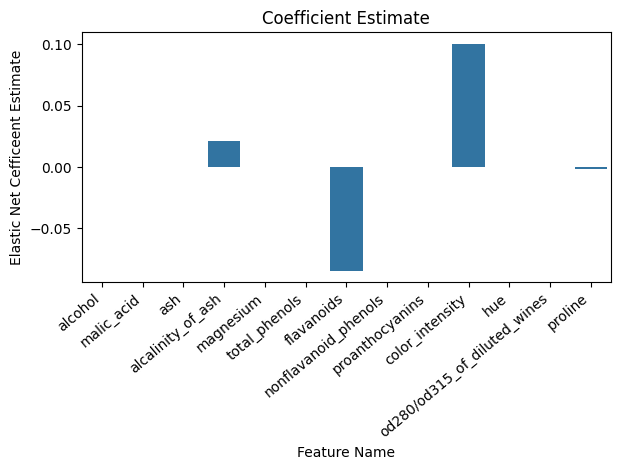

In [40]:
# Figure Size
ax = sns.barplot(data=el_net_coeff_df, x="Feature_name", y="Coefficient Estimate")
ax.set_title("Coefficient Estimate")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Feature Name");
ax.set_ylabel("Elastic Net Cefficeent Estimate");
plt.tight_layout()
plt.show()

In [41]:
#Applying pipline with standardsaclaer with SGDRegress and ElasticNet
elastic_sgd_pipeline = make_pipeline(StandardScaler(), SGDRegressor(alpha=1, l1_ratio=0.1, penalty = "elasticnet"))                  
elastic_sgd_pipeline.fit(X_train, y_train)
print("Intercept")
print(elastic_sgd_pipeline[1].intercept_,)
print("Coeficent")
print(elastic_sgd_pipeline[1].coef_)

Intercept
[0.94713643]
Coeficent
[-0.00713244  0.02182017  0.          0.06448291  0.         -0.05656026
 -0.13851036  0.01075257 -0.00464843  0.01453537 -0.07156394 -0.13088789
 -0.10152492]


<p>
<strong> Background</strong>
The recently started human and other genome projects are likely to change the situation of 
molecular biology. Comprehensive analyses of whole genomic sequences will enable us to 
understand the general mechanisms of how protein and nucleic acid functions are encoded in the 
sequence data
</p>
<p>
<strong> Dataset description: </strong>
There are 8 features and one target in the dataset. All the features are in a 
numerical format, and the target is in text format. For further information about the attributes, 
please read "Data Set Information.pdf"
</p>

In [42]:
#importlibray
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [43]:
yeast_df = pd.read_csv('yeast2vs4.csv');

In [44]:
yeast_df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [45]:
yeast_df.shape

(514, 9)

In [46]:
#checking Null values
yeast_df.isna().sum()

mcg      0
gvh      0
alm      0
mit      0
erl      0
pox      0
vac      0
nuc      0
class    0
dtype: int64

In [47]:
yeast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     514 non-null    float64
 1   gvh     514 non-null    float64
 2   alm     514 non-null    float64
 3   mit     514 non-null    float64
 4   erl     514 non-null    float64
 5   pox     514 non-null    float64
 6   vac     514 non-null    float64
 7   nuc     514 non-null    float64
 8   class   514 non-null    object 
dtypes: float64(8), object(1)
memory usage: 36.3+ KB


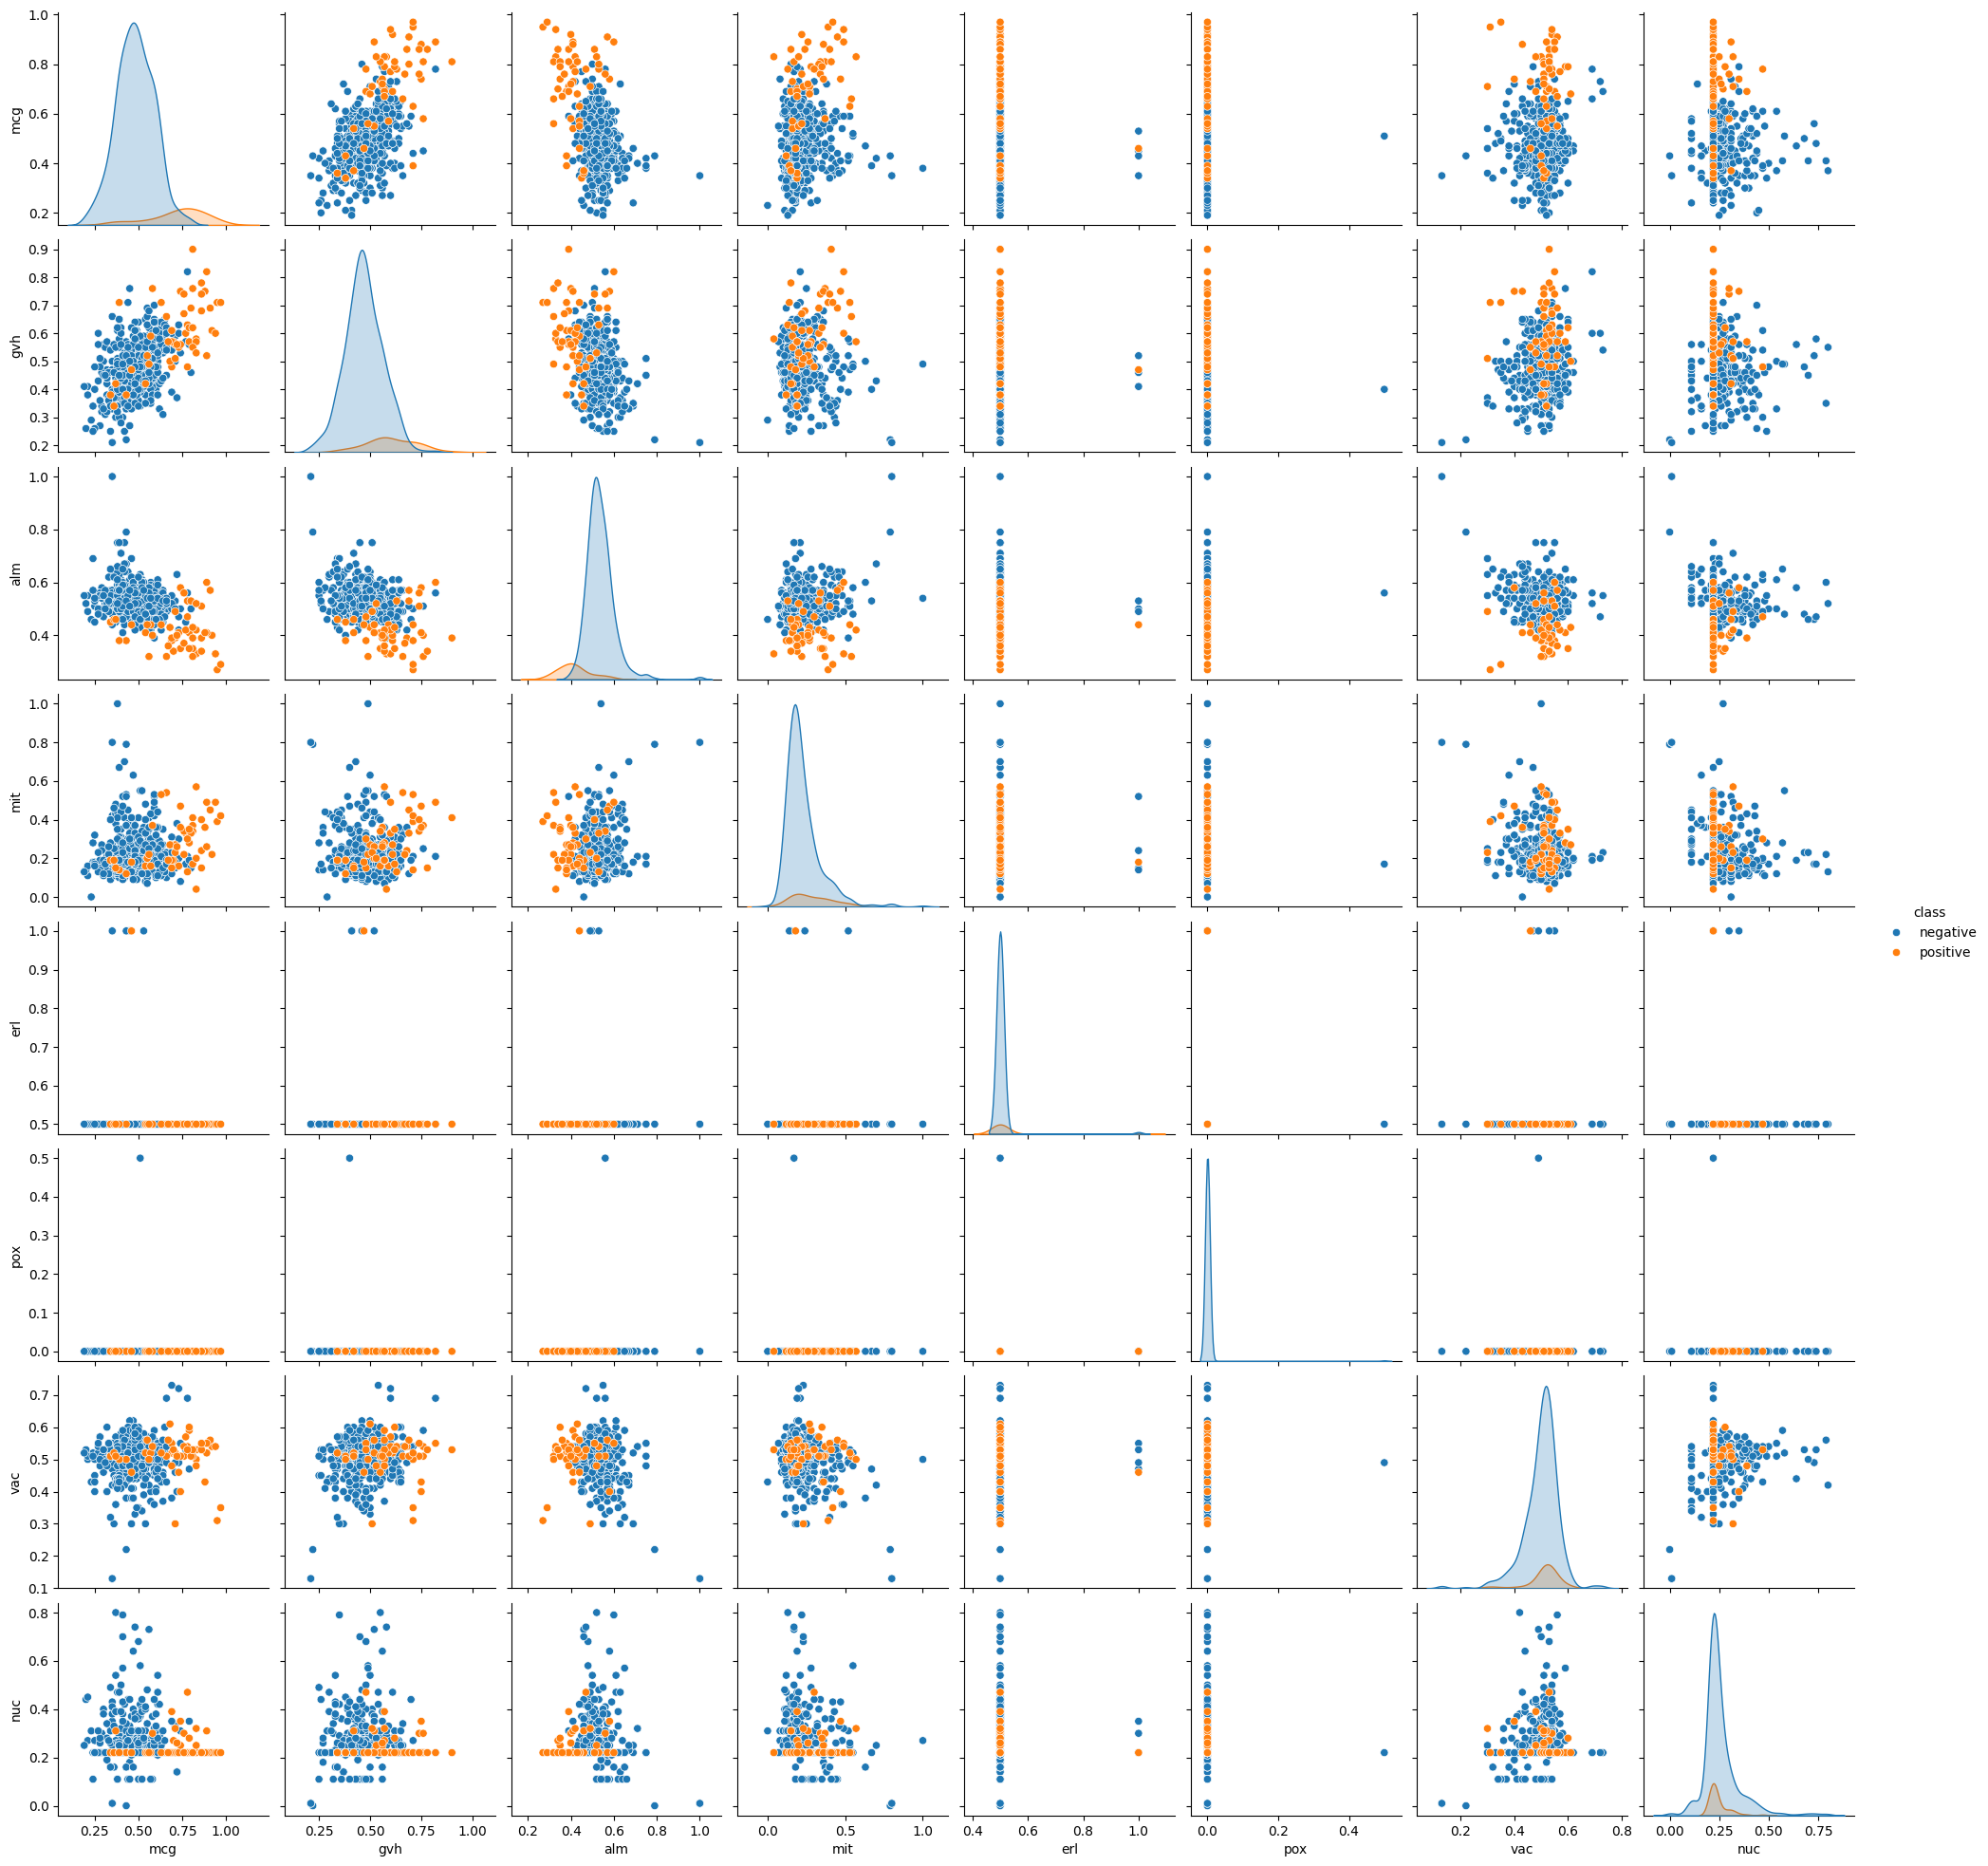

In [48]:
#Visualize data class each other
sns.pairplot(yeast_df,hue="class")
plt.show()

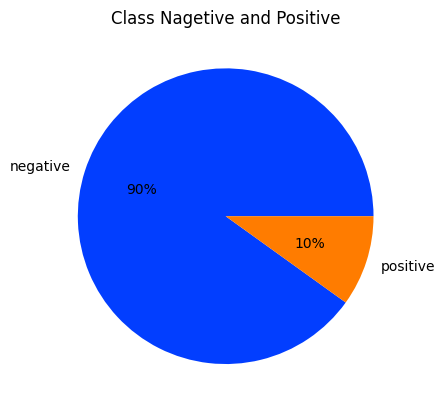

In [49]:
# Target value Clas Positive and Nagative 
data =yeast_df["class"].value_counts().values
keys = yeast_df["class"].value_counts().keys()
palette_color = sns.color_palette('bright')
plt.title("Class Nagetive and Positive")
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder
class_encoder=LabelEncoder()
yeast_df["class"]=class_encoder.fit_transform(yeast_df["class"].values)

In [51]:
yeast_df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,0
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,0
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,0
...,...,...,...,...,...,...,...,...,...
509,0.81,0.90,0.39,0.41,0.5,0.0,0.53,0.22,1
510,0.83,0.53,0.52,0.20,0.5,0.0,0.48,0.25,1
511,0.78,0.48,0.47,0.30,0.5,0.0,0.53,0.47,1
512,0.72,0.56,0.40,0.26,0.5,0.0,0.51,0.26,1


**Data Seperation target and X dataset**

In [52]:
X=yeast_df.iloc[:,:-1].values
y=yeast_df.iloc[:,-1].values

In [53]:
X_df =yeast_df[['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']]

In [54]:
X_df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,0.504611,0.482763,0.523463,0.232607,0.504864,0.000973,0.500467,0.256070
std,0.134528,0.103216,0.075013,0.117278,0.049122,0.022054,0.063732,0.091569
min,0.190000,0.210000,0.270000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.420000,0.490000,0.160000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.470000,0.520000,0.200000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.550000,0.560000,0.270000,0.500000,0.000000,0.540000,0.270000
max,0.970000,0.900000,1.000000,1.000000,1.000000,0.500000,0.730000,0.800000


In [55]:
#Spliting Train and test Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**lOGISTIC Regression Model**

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [57]:
#Prediction response for test and train 
y_pred = lr_model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Train Score:",lr_model.score(X_train,y_train))
print("Test Score:",lr_model.score(X_test,y_test))
print("=====================Metrix================================")
print(classification_report(y_test, y_pred))

Accuracy: 0.912621359223301
Train Score: 0.9148418491484185
Test Score: 0.912621359223301
=====================Metrix================================
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        92
           1       1.00      0.18      0.31        11

    accuracy                           0.91       103
   macro avg       0.96      0.59      0.63       103
weighted avg       0.92      0.91      0.88       103



**SVM (Support Vector Machine) Model**

In [58]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel="rbf",random_state=42)
svc_classifier.fit(X_train,y_train)

SVC(random_state=42)

In [59]:
#Prediction response for test and train 
y_pred = svc_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Train Score:",svc_classifier.score(X_train,y_train))
print("Test Score:",svc_classifier.score(X_test,y_test))
print("=====================Metrix================================")
print(classification_report(y_test, y_pred))

Accuracy: 0.9611650485436893
Train Score: 0.9586374695863747
Test Score: 0.9611650485436893
=====================Metrix================================
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        92
           1       1.00      0.64      0.78        11

    accuracy                           0.96       103
   macro avg       0.98      0.82      0.88       103
weighted avg       0.96      0.96      0.96       103



**Knn Model**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(metric="minkowski",p=2)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
#Prediction response for test and train 
y_pred = knn_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Train Score:",knn_classifier.score(X_train,y_train))
print("Test Score:",knn_classifier.score(X_test,y_test))
print("=====================Metrix================================")
print(classification_report(y_test, y_pred))

Accuracy: 0.9611650485436893
Train Score: 0.9586374695863747
Test Score: 0.9611650485436893
=====================Metrix================================
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        92
           1       1.00      0.64      0.78        11

    accuracy                           0.96       103
   macro avg       0.98      0.82      0.88       103
weighted avg       0.96      0.96      0.96       103



**Gaussian Naive Bayes (GaussianNB) Model**

In [62]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(X_train,y_train)

GaussianNB()

In [63]:
#Prediction response for test and train 
y_pred = bayes_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Train Score:",bayes_classifier.score(X_train,y_train))
print("Test Score:",bayes_classifier.score(X_test,y_test))
print("=====================Metrix================================")
print(classification_report(y_test, y_pred))

Accuracy: 0.9611650485436893
Train Score: 0.9513381995133819
Test Score: 0.9611650485436893
=====================Metrix================================
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.82      0.82      0.82        11

    accuracy                           0.96       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.96      0.96      0.96       103



**Decision Tree Classification  Model**

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [65]:
#Prediction response for test and train 
y_pred = tree_classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Train Score:",tree_classifier.score(X_train,y_train))
print("Test Score:",tree_classifier.score(X_test,y_test))
print("=====================Metrix================================")
print(classification_report(y_test, y_pred))

Accuracy: 0.970873786407767
Train Score: 1.0
Test Score: 0.970873786407767
=====================Metrix================================
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.83      0.91      0.87        11

    accuracy                           0.97       103
   macro avg       0.91      0.94      0.93       103
weighted avg       0.97      0.97      0.97       103



In [66]:
models=["Logistic Regression Train","Logistic Regression Test","SVC Train","SVC Test","KNN Train","KNN Test","Naive Bayes Train","Naive Bayes Test","Decision Tree Train","Decision Tree Test"]
scores=[lr_model.score(X_train,y_train),lr_model.score(X_test,y_test),svc_classifier.score(X_train,y_train),svc_classifier.score(X_test,y_test),knn_classifier.score(X_train,y_train),knn_classifier.score(X_test,y_test),bayes_classifier.score(X_train,y_train),bayes_classifier.score(X_test,y_test),tree_classifier.score(X_train,y_train),tree_classifier.score(X_test,y_test)]

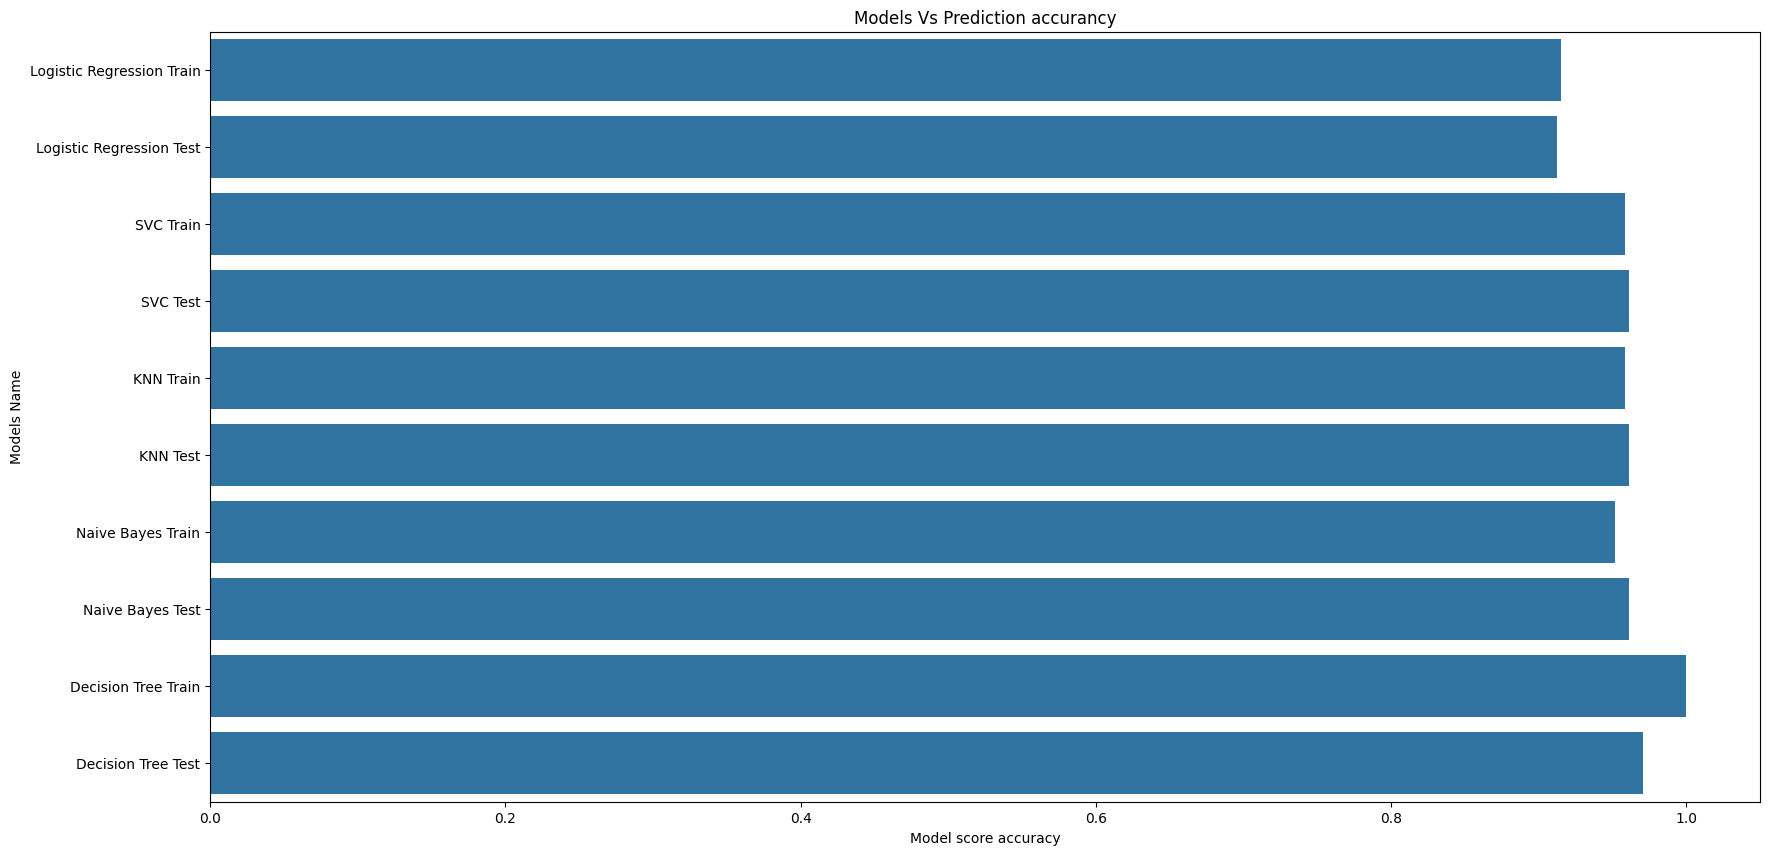

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x=scores,y=models)
plt.xlabel("Model score accuracy")
plt.ylabel("Models Name")
plt.title("Models Vs Prediction accurancy")
plt.show()

<p> 
<h3> Hypereparameter Optimiziation</h3>
As i research and RND  in google search and othere website and CHART GPTI TOOLS. I have found related Machine learing Hypereparamter Optimization techniques.

Thesis are moustly opeople use for day to day worked for theire problem usecase. Theeise are the following hyper parameter tuning framewok
</p>
<ul>
    <li> GridSearchCV</li>
    <li> RandomizeSearchCV</li>
    <li> BayesianOptimization</li>
    <li> Optuna</li>
    <li> hyperopt</li>    
</ul> 
 <p> For experiment  this all pakage libray framework needed to install 
    <ul>
    <li> !pip install scikit-learn</li>
    <li> !pip install scikit-optimize</li>
    <li> !pip install bayesian-optimization</li>
    <li> !pip install hyperopt</li>
    <li> !pip install optuna</li>    
  </ul>
 
</p>

<h4> Support Vector machine SVM Modle  demonstraion for Hyper Parameter Tuning and Optimization<h4>

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from skopt import BayesSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import sklearn
import optuna
from hyperopt import fmin, tpe, hp

<h3> Hpyterparamere Optimizer GridSearchCV</h3>

In [73]:
#define list hypeerparmeter veriables
list_hyperpameter = list()
svm = SVC()
param_gridsearchCV = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly','sigmoid']
}
grid_search = GridSearchCV(estimator=svm, param_grid=param_gridsearchCV, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
search_predictions = grid_search.predict(X_test)
print(classification_report(y_test, search_predictions))

list_hyperpameter.append({"Hyperparameter Optimizer": "GridSearchCV", "Train Accurancy":accuracy,"Model": "SVM",  "Optimal Params":best_params })

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test Accuracy: 0.970873786407767
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.90      0.82      0.86        11

    accuracy                           0.97       103
   macro avg       0.94      0.90      0.92       103
weighted avg       0.97      0.97      0.97       103



<h3> Hpyterparamere Optimizer RandomSearch</h3>

In [74]:
svm = SVC()
pareameter_config = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.1, 100),
    'kernel': ['linear', 'rbf', 'poly','sigmoid']
}
random_search = RandomizedSearchCV(estimator=svm, param_distributions=pareameter_config, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
random_predictions = random_search.predict(X_test)
print(classification_report(y_test, random_predictions))


list_hyperpameter.append({"Hyperparameter Optimizer": "RandomizedSearchCV", "Train Accurancy":accuracy,"Model": "SVM",  "Optimal Params":best_params })

Best Hyperparameters: {'C': 0.8066305219717406, 'gamma': 2.406242504141576, 'kernel': 'poly'}
Test Accuracy: 0.970873786407767
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.90      0.82      0.86        11

    accuracy                           0.97       103
   macro avg       0.94      0.90      0.92       103
weighted avg       0.97      0.97      0.97       103



<h3> Hpyterparamere Optimizer BayesianOptimization</h3>

In [75]:
def svm_evaluate(C, gamma):
    svm = SVC(C=C, gamma=gamma, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

#Define SVM parameter
parameter_config = {'C': (0.01, 100), 'gamma': (0.01, 10)}
# Create a BayesianOptimization instance
optimizer = BayesianOptimization(f=svm_evaluate, pbounds=parameter_config, random_state=42)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=20)

# Get the best hyperparameters and result
best_params = optimizer.max['params']
best_accuracy = optimizer.max['target']

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", best_accuracy)

list_hyperpameter.append({"Hyperparameter Optimizer": "BayesianOptimization", "Train Accurancy":best_accuracy,"Model": "SVM",  "Optimal Params":best_params })


|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
| 1         | 0.9612    | 37.46     | 9.508     |
| 2         | 0.9612    | 73.2      | 5.991     |
| 3         | 0.9612    | 15.61     | 1.568     |
| 4         | 0.9806    | 5.818     | 8.663     |
| 5         | 0.9612    | 60.12     | 7.084     |
| 6         | 0.9806    | 5.723     | 8.939     |
| 7         | 0.8932    | 0.01055   | 3.261     |
| 8         | 0.9709    | 10.56     | 9.927     |
| 9         | 0.9612    | 21.82     | 9.754     |
| 10        | 0.9806    | 29.2      | 1.712     |
| 11        | 0.9612    | 34.29     | 0.1025    |
| 12        | 0.9709    | 24.41     | 0.2664    |
| 13        | 0.9709    | 29.22     | 7.059     |
| 14        | 0.9709    | 99.85     | 0.2126    |
| 15        | 0.9515    | 98.23     | 7.766     |
| 16        | 0.9612    | 91.43     | 0.03497   |
| 17        | 0.9709    | 49.66     | 0.1494    |
| 18        | 0.9612    | 48.9      | 6.882     |


<h3> Hpyterparamere Optimizer Optuna</h3>

In [76]:
def optuna_model_potimize(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.01, 100),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    }
    svm = SVC(**params)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    return accuracy

#Create optuna optimizer object
study_opt = optuna.create_study(direction='maximize')
study_opt.optimize(optuna_model_potimize, n_trials=50)

#best hyperparameters and result
best_params = study_opt.best_params
best_accuracy = study_opt.best_value

print("optuna Best Hyperparameters:", best_params)
print("Test Accuracy:", best_accuracy)

list_hyperpameter.append({"Hyperparameter Optimizer": "optuna", "Train Accurancy":best_accuracy,"Model": "SVM",  "Optimal Params":best_params })


[I 2025-03-09 14:41:18,234] A new study created in memory with name: no-name-512c75db-da3d-4e77-a065-a28d82038de5
C:\Users\farenrai\AppData\Local\Temp\ipykernel_2624\3909093562.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2025-03-09 14:41:18,247] Trial 0 finished with value: 0.8932038834951457 and parameters: {'C': 0.025584705216808373, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8932038834951457.
C:\Users\farenrai\AppData\Local\Temp\ipykernel_2624\3909093562.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2025-03-09 14:41:18,257] Trial 1 finished with valu

optuna Best Hyperparameters: {'C': 33.96777427304843, 'kernel': 'linear'}
Test Accuracy: 0.9805825242718447


optuna Best Hyperparameters: {'C': 19.741995512403996, 'kernel': 'linear'}
Test Accuracy: 0.9805825242718447


In [77]:
hype_optimize_df = pd.DataFrame(list_hyperpameter)
hype_optimize_df

,Hyperparameter Optimizer,Train Accurancy,Model,Optimal Params
0,GridSearchCV,0.970874,SVM,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
1,RandomizedSearchCV,0.970874,SVM,"{'C': 0.8066305219717406, 'gamma': 2.406242504..."
2,BayesianOptimization,0.980583,SVM,"{'C': 5.817780380698264, 'gamma': 8.6630996962..."
3,optuna,0.980583,SVM,"{'C': 33.96777427304843, 'kernel': 'linear'}"


<p> As you can see here. I print data which model hyperparmere optimizer given best result and there optimal best parameter.
    BayesianOptimization and optuna given the best result then  girdsearchcv and randomizedserchcv.
   </p>

<h3>Reference </h3>

<p> Report all created by myselft doing RND on google Content and Learing help of flowing resources</p>
<ul>
    <li>
        <a href="https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/#Introduction"> Blog post of analyticsvidhay.com </a>
    </li>
     <li><a href="https://www.kaggle.com/code/debanjan2002/yeast-predction">Kagale Blog Post</a></li>
     <li><a href="">GPT TOOl</a></li>
     <li> <a href="https://stackabuse.com/understanding-svm-hyperparameters/"> https://stackabuse.com/understanding-svm-hyperparameters/</a></li>
    <li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html"> using sk-learn Tutorials </a> </li>
     <li><a href="https://optuna.org/#code_examples">https://optuna.org/#code_examples</a></li>
 </ul>   